## Decision Tree - Classification

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

<img src='../../img/Decision_Tree_1.png' height="1800" width="1800">

### Entropy
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). The tree algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

<img src='../../img/Entropy.png' height="600" width="800">

## Information Gain
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Step 1: Calculate entropy of the target.

<img src='../../img/Entropy_3.png' height="600" width="800">

Step 2: The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 

<img src='../../img/Entropy_gain.png' height="600" width="800">

<img src='../../img/Entropy_attributes.png' height="800" width="800">

Step 3: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

<img src='../../img/decision_tree_slices.png' height="600" width="800">

Step 4a: A branch with entropy of 0 is a leaf node.

<img src='../../img/Entropy_overcast.png' height="600" width="800">

Step 4b: A branch with entropy more than 0 needs further splitting. We repeat until entropy is zero for all branches.

<img src='../../img/Entropy_Sunny.png' height="600" width="800">

### Decision Tree to Decision Rules

A decision tree can easily be transformed to a set of rules by mapping from the root node to the leaf nodes one by one.

<img src='../../img/Decision_rules.png' height="600" width="800">

### Code Dictionary
code | description
-----|------------
`DecisionTreeClassifier()` | Decision Tree Classification.
`.makeblob` |  Generate random data set with a specified amount of clusters.

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [3]:
y_pred = classifier.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
confusion_matrix(y_test, y_pred)

array([[62,  6],
       [ 3, 29]])

In [6]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
def plot_tree():
    X_set, y_set = X_test, y_test
    plt.figure(figsize=(10,8))
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = plt.cm.Paired)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],cmap = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Classifier (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

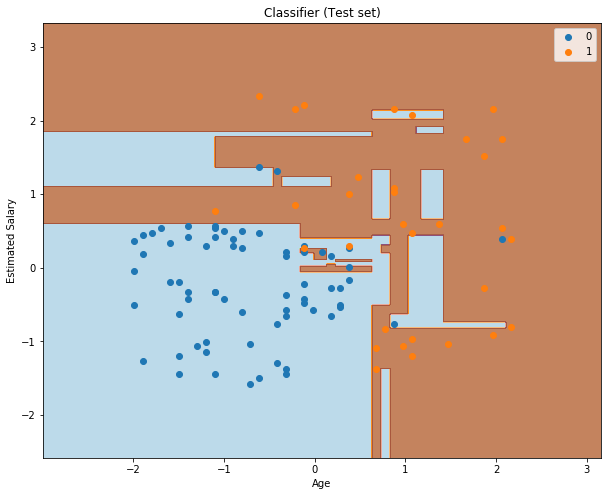

In [7]:
plot_tree()

In [8]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

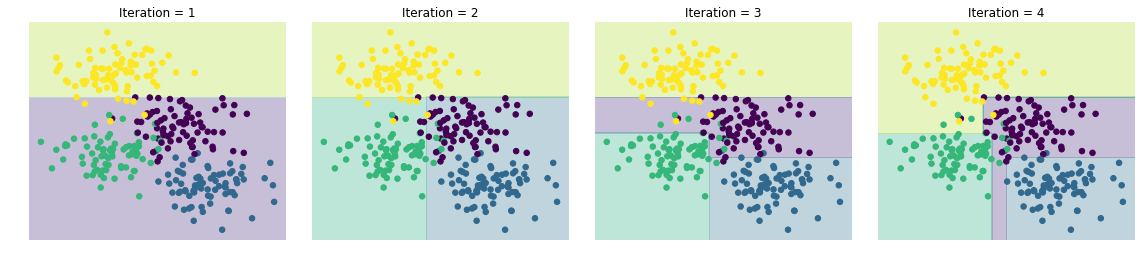

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('Iteration = {0}'.format(depth))

## Random Forest 

A random forest model is a collection of decision tree models that are combined together to make predictions. When you make a random forest, you have to specify the number of decision trees you want to use to make the model. 

### Algorithm:
- Take random samples of observations from your training data and 
- Builds a decision tree model for each sample. 
- The random samples are typically drawn with replacement, meaning the same observation can be drawn multiple times. 
- The end result is a bunch of decision trees that are created with different groups of data records drawn from the original training data.

<img src='../../img/rforest.png' height="600" width="800">

Random forests are an example of an ensemble model: a model composed of some combination of several different underlying models.

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, random_state=0, criterion='entropy', oob_score=True )
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_test, y_pred)

array([[63,  5],
       [ 3, 29]])

Since random forest models involve building trees from random subsets or "bags" of data, model performance can be estimated by making predictions on the out-of-bag (OOB) samples instead of using cross validation. You can use cross validation on random forests, but OOB validation already provides a good estimate of performance and building several random forest models to conduct K-fold cross validation with random forest models can be computationally expensive.

In [15]:
print("OOB accuracy: ")
print(classifier.oob_score_)

OOB accuracy: 
0.8566666666666667


The random forest classifier assigns an importance value to each feature used in training. Features with higher importance were more influential in creating the model, indicating a stronger association with the response variable. Let's check the feature importance for our random forest model:

In [16]:
for feature, imp in zip(dataset.columns[[2,3]], classifier.feature_importances_):
    print(feature, imp)

Age 0.4977165631239794
EstimatedSalary 0.5022834368760206


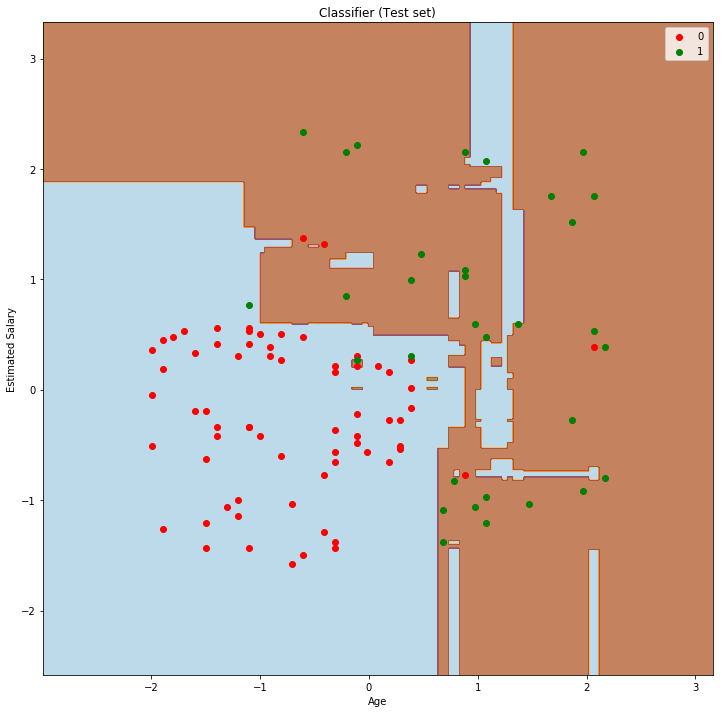

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(12,12))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.Paired)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [18]:
## ![forest](../../img/forest.png)